In [3]:
from pylearn2.utils.serial import load as load_model
from pylearn2.gui.get_weights_report import get_weights_report
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os.path
import io
from IPython.display import display, Image

Using gpu device 0: Tesla K20c


In [171]:
model = load_model(os.path.expandvars('${DATA_DIR}/plankton/models/alexnet_based_-_the_return_64_inputs_experiment_recent.pkl'))

In [153]:
print('## Model structure summary\n')
print(model)
params = model.get_params() 
n_params = {p.name : p.get_value().size for p in params}
total_params = sum(n_params.values())
print('\n## Number of parameters\n')
print('  ' + '\n  '.join(['{0} : {1} ({2:.1f}%)'.format(k, v, 100.*v/total_params) 
                          for k, v in sorted(n_params.items(), key=lambda x: x[0])]))
print('\nTotal : {0}'.format(total_params))

## Model structure summary

h1
	Input space: Conv2DSpace(shape=(64, 64), num_channels=1, axes=('b', 0, 1, 'c'), dtype=float32)
	Total input dimension: 4096
h2
	Input space: Conv2DSpace(shape=(29, 29), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 40368
h3
	Input space: Conv2DSpace(shape=(17, 17), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 13872
h4
	Input space: Conv2DSpace(shape=(15, 15), num_channels=64, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 14400
h5
	Input space: Conv2DSpace(shape=(17, 17), num_channels=64, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 18496
h6
	Input space: Conv2DSpace(shape=(8, 8), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 3072
y
	Input space: VectorSpace(dim=1024, dtype=float32)
	Total input dimension: 1024

## Number of parameters

  h1_W : 2352 (0.1%)
  h1_b : 48 (0.0%)
  h2_W : 57600 (1.7%)
  h2_b : 48 (0.0%)
  h3_W :

In [175]:
model_no_mom = load_model(os.path.expandvars('${DATA_DIR}/plankton/models/alexnet_based_-_the_return_64_inputs_no_momentum_experiment_recent.pkl'))

Plot train and valid set NLL

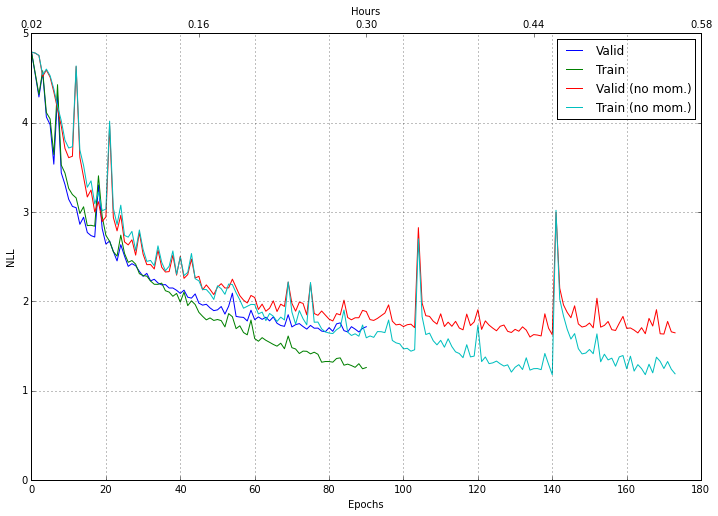

In [176]:
tr = np.array(model.monitor.channels['valid_y_y_1_nll'].time_record) / 3600.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(model.monitor.channels['valid_y_y_1_nll'].val_record)
ax1.plot(model.monitor.channels['train_y_y_1_nll'].val_record)
ax1.plot(model_no_mom.monitor.channels['valid_y_y_1_nll'].val_record)
ax1.plot(model_no_mom.monitor.channels['train_y_y_1_nll'].val_record)
ax1.set_xlabel('Epochs')
ax1.legend(['Valid', 'Train', 'Valid (no mom.)', 'Train (no mom.)'])
ax1.set_ylabel('NLL')
ax1.set_ylim(0., 5.)
ax1.grid(True)
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,tr.shape[0],20))
ax2.set_xticklabels(['{0:.2f}'.format(t) for t in tr[::20]])
ax2.set_xlabel('Hours')

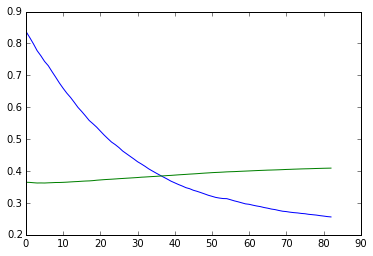

In [169]:
plt.plot(model.monitor.channels['train_term_1_l1_penalty'].val_record)
plt.plot(model.monitor.channels['train_term_2_weight_decay'].val_record)

smallest enc weight magnitude: 2.11157930607e-06
mean enc weight magnitude: 0.09389282763
max enc weight magnitude: 0.450681269169


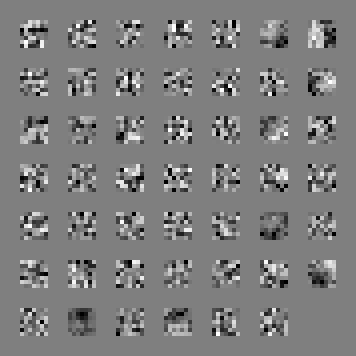

In [170]:
pv = get_weights_report(model=model)
img = pv.get_img()
img = img.resize((4*img.size[0], 4*img.size[1]))
img_data = io.BytesIO()
img.save(img_data, format='png')
display(Image(data=img_data.getvalue(), format='png'))

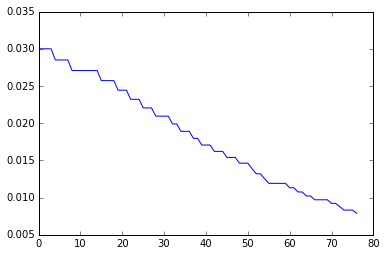

In [158]:
plt.plot(model.monitor.channels['learning_rate'].val_record)

Plot ratio of update norms to parameter norms across epochs for different layers

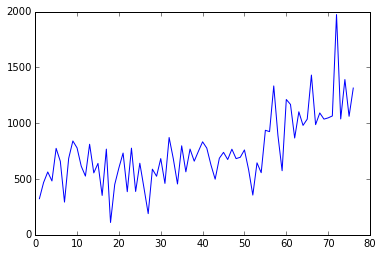

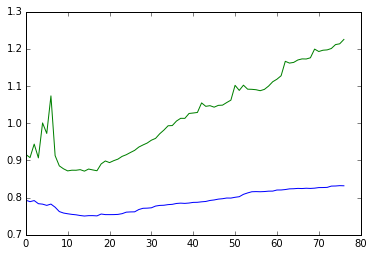

In [159]:
h1_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h1_W_kernel_norm_mean'].val_record])
h1_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h1_kernel_norms_mean'].val_record])
plt.plot(h1_W_norms / h1_W_up_norms)
#plt.ylim(0,1000)
plt.show()
plt.plot(model.monitor.channels['valid_h1_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h1_kernel_norms_max'].val_record)

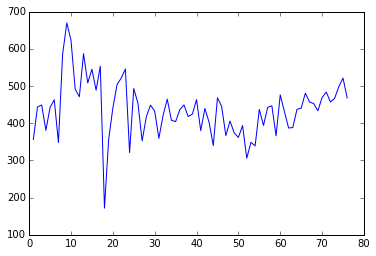

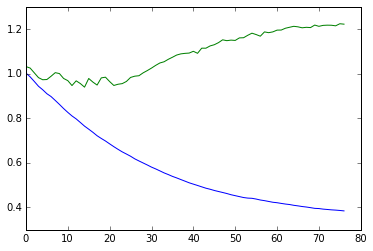

In [160]:
h2_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h2_W_kernel_norm_mean'].val_record])
h2_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h2_kernel_norms_mean'].val_record])
plt.plot(h2_W_norms / h2_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_h2_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h2_kernel_norms_max'].val_record)

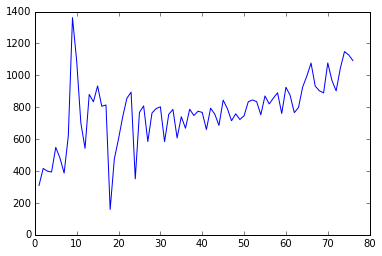

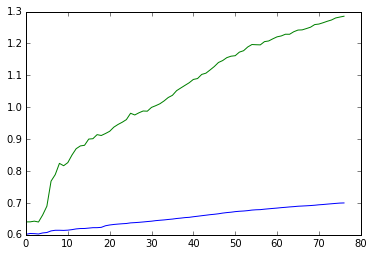

In [161]:
h3_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h3_W_kernel_norm_mean'].val_record])
h3_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h3_kernel_norms_mean'].val_record])
plt.plot(h3_W_norms / h3_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_h3_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h3_kernel_norms_max'].val_record)

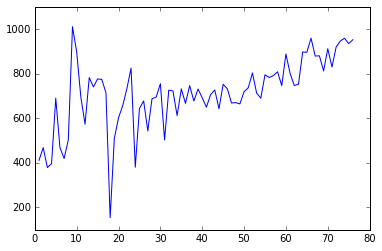

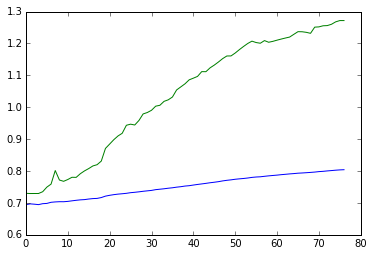

In [162]:
h4_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h4_W_kernel_norm_mean'].val_record])
h4_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h4_kernel_norms_mean'].val_record])
plt.plot(h4_W_norms / h4_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_h4_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h4_kernel_norms_max'].val_record)

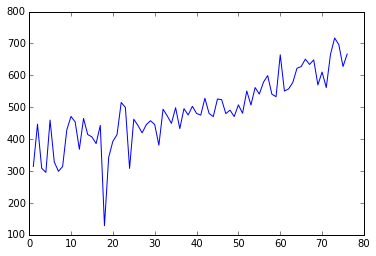

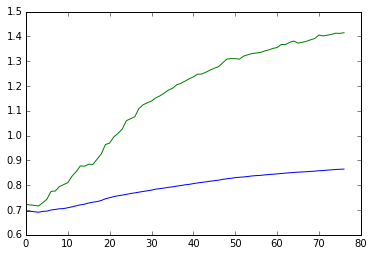

In [163]:
h5_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h5_W_kernel_norm_mean'].val_record])
h5_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h5_kernel_norms_mean'].val_record])
plt.plot(h5_W_norms / h5_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_h5_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h5_kernel_norms_max'].val_record)

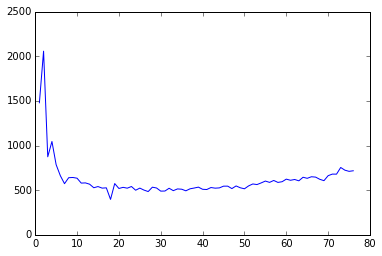

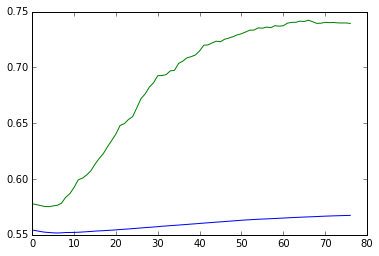

In [164]:
h6_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h6_W_col_norm_mean'].val_record])
h6_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h6_col_norms_mean'].val_record])
plt.plot(h6_W_norms / h6_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_h6_col_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h6_col_norms_max'].val_record)

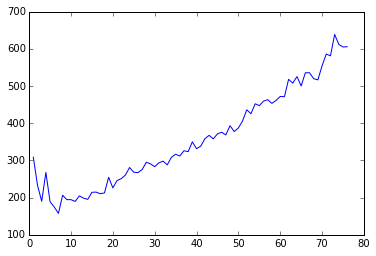

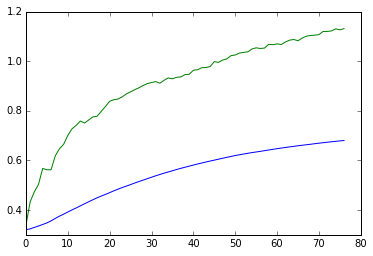

In [166]:
y_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_softmax_W_col_norm_mean'].val_record])
y_W_norms = np.array([float(v) for v in model.monitor.channels['valid_y_y_1_col_norms_mean'].val_record])
plt.plot(y_W_norms / y_W_up_norms)
plt.show()
plt.plot(model.monitor.channels['valid_y_y_1_col_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_y_y_1_col_norms_max'].val_record)